In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

pd.set_option('display.max_rows', 20)

/Library/Python/2.7/site-packages/sklearn/utils/__init__.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/Library/Python/2.7/site-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/Library/Python/2.7/site-packages/sklearn/utils/extmath.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sparsefuncs_fast import csr_row_norms
/Library/Python/2.7/site-packages/sklearn/metrics/cluster/supervised.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .expected_mutual_info_fast import expected_mutual_information
/Library/Python/2.7/site-packages/sklearn/metrics/pairwise.py:30: RuntimeWarning: numpy.dtype size changed, may indicate binary

In [4]:
# Read in data (tttt vs ttW+ttZ+ttH with 10 event-level features)
df = pd.read_pickle("data_fourtop.pkl.gz")

,signal,weight,htb,nbtags,njets,nleps,ptj1,ptj7,ptl1,ptl2,ptl3,q1
26853,1.0,0.000364,206.779846,2.0,7.0,2.0,373.429016,46.65897,137.676559,67.604263,-1.000000,-1.0
39238,0.0,0.004883,35.586071,1.0,3.0,2.0,188.072632,0.00000,121.428139,53.178535,-1.000000,-1.0
72196,0.0,0.003294,489.509369,2.0,4.0,3.0,408.042114,0.00000,208.297501,41.227451,156.992798,-1.0
37116,0.0,0.004319,85.794563,1.0,3.0,2.0,276.633606,0.00000,87.203590,49.023972,-1.000000,-1.0
67552,0.0,0.002928,296.612213,2.0,4.0,2.0,242.500763,0.00000,123.092628,41.000244,-1.000000,1.0
7662,0.0,0.001323,96.686806,1.0,3.0,2.0,163.566330,0.00000,34.729988,26.165741,-1.000000,1.0
17869,1.0,0.000278,227.744873,3.0,4.0,2.0,124.590347,0.00000,48.561928,40.814766,-1.000000,1.0
43967,0.0,0.002344,162.352158,1.0,4.0,2.0,234.663467,0.00000,170.528183,58.815033,-1.000000,1.0
41063,0.0,0.003675,194.716461,2.0,4.0,2.0,218.326660,0.00000,53.771667,24.278244,-1.000000,-1.0
43615,0.0,0.003369,137.970306,1.0,2.0,2.0,596.370483,0.00000,141.868927,107.835167,-1.000000,1.0


/Library/Python/2.7/site-packages/pandas/plotting/_tools.py:203: UserWarning: When passing multiple axes, layout keyword is ignored
  "ignored", UserWarning)


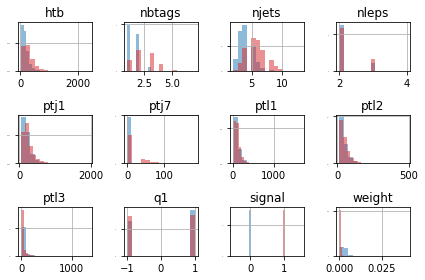

In [5]:
# Plot all columns separately for background and signal
ax = df[df.signal==0].hist(alpha=0.5,color="C0",ylabelsize=0,density=True,layout=(3,4),bins=15)
ax = df[df.signal==1].hist(ax=ax.flatten(),alpha=0.5,color="C3",ylabelsize=0,density=True,layout=(3,4),bins=15)

plt.tight_layout()

In [14]:
# All column names except for truth variable (signal) and event weight (weight) are features
feature_names = sorted(list(set(df.columns.values)-set(["signal","weight"])))
x_train, x_test, y_train, y_test, weights_train, weights_test = train_test_split(
                df[feature_names],
                df["signal"],
                df["weight"],
                test_size=0.25, random_state=42,
                )

# Make a classifier and fit it on the training set, feeding in event weights as well
bdt = GradientBoostingClassifier(n_estimators=200,max_depth=4,min_samples_split=2,learning_rate=0.06,verbose=True)
bdt.fit(x_train, y_train, sample_weight=weights_train)

# Variable importance after training
print("Variable ranking")
print("-"*15)
print("\n".join(["{:<10s} {:.2f}".format(fn,fi) for fi, fn in sorted(zip(bdt.feature_importances_,feature_names))[::-1]]))

      Iter       Train Loss   Remaining Time 
         1           0.3848           13.47s
         2           0.3695           13.36s
         3           0.3583           14.01s
         4           0.3494           14.65s
         5           0.3422           14.54s
         6           0.3361           14.26s
         7           0.3309           14.09s
         8           0.3265           13.86s
         9           0.3225           13.75s
        10           0.3188           13.81s
        20           0.2975           13.07s
        30           0.2888           12.43s
        40           0.2844           11.72s
        50           0.2817           10.93s
        60           0.2798           10.19s
        70           0.2783            9.47s
        80           0.2770            8.71s
        90           0.2760            7.94s
       100           0.2752            7.23s
       200           0.2695            0.00s
Variable ranking
---------------
ptj7       0.18
nbtag

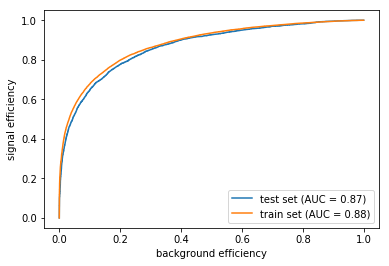

In [15]:
# Make predictions for train and test sets, and plot ROC curves
preds_train = bdt.predict_proba(x_train)[:,1]
preds_test = bdt.predict_proba(x_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test,preds_test)
plt.plot(fpr, tpr, label="test set (AUC = {:.2f})".format(np.trapz(tpr,fpr)))

fpr, tpr, thresh = roc_curve(y_train,preds_train)
plt.plot(fpr, tpr, label="train set (AUC = {:.2f})".format(np.trapz(tpr,fpr)))

plt.xlabel("background efficiency")
plt.ylabel("signal efficiency")
plt.legend()

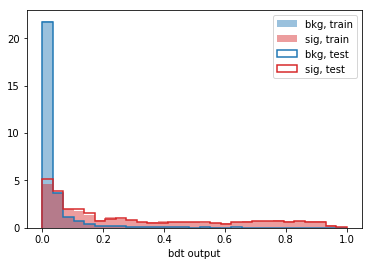

In [16]:
# plot distribution of BDT outputs separately for train/test and signal/background
bins = np.linspace(0.,1.,30)
plt.hist(preds_train[y_train==0], weights=weights_train[y_train==0], bins=bins,histtype="stepfilled",alpha=0.45, density=True, label="bkg, train",color="C0")
plt.hist(preds_train[y_train==1], weights=weights_train[y_train==1], bins=bins,histtype="stepfilled",alpha=0.45, density=True, label="sig, train",color="C3")
plt.hist(preds_test[y_test==0], weights=weights_test[y_test==0], bins=bins,histtype="step",alpha=1.0, density=True, label="bkg, test",color="C0", lw=1.5, linestyle="solid")
plt.hist(preds_test[y_test==1], weights=weights_test[y_test==1], bins=bins,histtype="step",alpha=1.0, density=True, label="sig, test",color="C3", lw=1.5, linestyle="solid")
plt.xlabel("bdt output")
plt.legend()